### TonEd Notebook

In [2]:
#import our stuff here
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath, math, nussl
from IPython.display import Audio

In [3]:
#test drive to make sure basic stuff works
sr = 44100.
full, sr = librosa.load("samples/EmilyOtt_Full.wav", sr)
Audio(full, rate=sr)

In [4]:
crunchy, sr = librosa.load("samples/EmilyOtt_Crunchy.wav", sr)
Audio(crunchy, rate=sr)

In [5]:
thin, sr = librosa.load("samples/EmilyOtt_Thin.wav", sr)
Audio(thin, rate=sr)

In [6]:
full_mfccs = librosa.feature.mfcc(y=full, sr=sr)
crunchy_mfccs = librosa.feature.mfcc(y=crunchy, sr=sr)
thin_mfccs = librosa.feature.mfcc(y=thin, sr=sr)

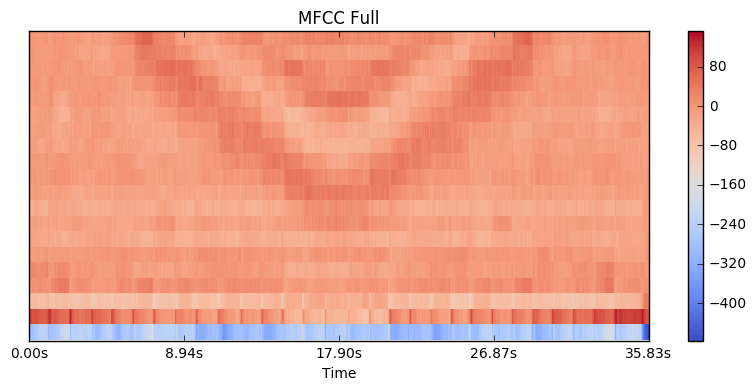

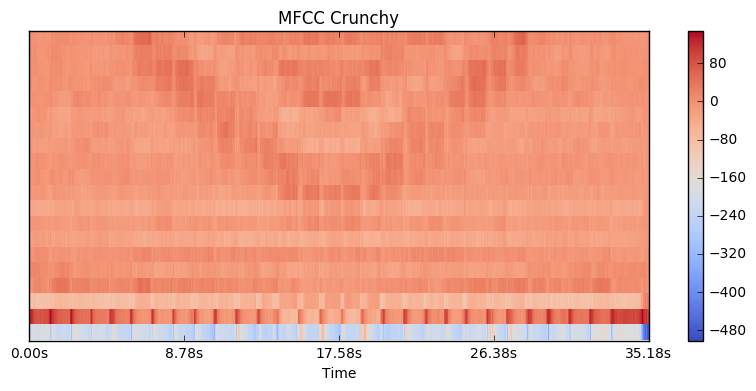

In [7]:
#compare MFCC of full and crunchy signals
plt.figure(figsize=(10,4))
librosa.display.specshow(full_mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Full')
plt.show()
plt.figure(figsize=(10, 4))
librosa.display.specshow(crunchy_mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Crunchy')
plt.show()

In [9]:
num_zeros = full_mfccs.shape[1] - crunchy_mfccs.shape[1]
print full_mfccs.shape
print crunchy_mfccs.shape
z = np.zeros((20, num_zeros))
print z.shape
crunchy_mfccs_padded = np.concatenate((crunchy_mfccs, z), axis=1)
full_mfccs_clipped = full_mfccs[:,0:-num_zeros]
print full_mfccs_clipped.shape

(20, 1544)
(20, 1516)
(20, 28)
(20, 1516)


In [10]:
diff = abs(crunchy_mfccs - full_mfccs_clipped)
diff

array([[  2.24439612e+02,   1.01610896e+02,   3.13983279e+01, ...,
          2.53006166e+02,   2.78429085e+02,   2.85319718e+02],
       [  8.48091906e+01,   2.12308389e+01,   1.04465874e+01, ...,
          1.28535948e+01,   2.55824101e+01,   2.61719112e+01],
       [  6.49935133e+01,   1.10466828e+01,   1.08143376e-02, ...,
          6.28681663e+01,   7.85341032e+01,   8.33904742e+01],
       ..., 
       [  4.89407579e+00,   3.34596742e+00,   3.66240830e+00, ...,
          9.49517612e+00,   1.07806300e+01,   1.03806366e+01],
       [  1.74989503e+00,   1.00306798e+01,   8.78276650e+00, ...,
          6.33213345e+00,   5.84700874e+00,   8.22188981e+00],
       [  2.70574160e+00,   3.75063839e+00,   1.96103388e+00, ...,
          3.91156962e+00,   3.68123652e+00,   8.76449773e+00]])

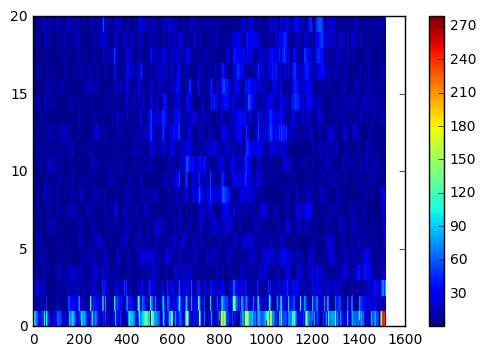

In [11]:
TT, FF = np.meshgrid(np.arange(diff.shape[0]+1), np.arange(diff.shape[1]))
plt.pcolormesh(FF, TT, diff.T)
plt.colorbar()
plt.show()